## Plot random data point 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# df = pd.read_csv('geoloc_elev.csv')
df = pd.read_csv('https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/datasets/geoloc_elev.csv')

# আমাদের দুটো ফিচার হলেই যথেষ্ট 
X = df[['lat', 'lon']].values
y = df['target'].values

In [3]:
X.shape , y.shape

((1500, 2), (1500,))

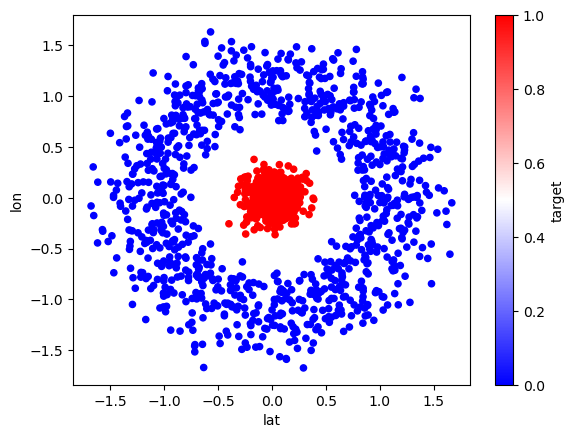

In [4]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

There is two area and we have to distinguish this two area.
- Support Vector Machine
- Neural Network

In [5]:
from sklearn.svm import SVC
clf=SVC(gamma='auto')
clf.fit(X,y)

SVC(gamma='auto')

In [6]:
from mlxtend.plotting import plot_decision_regions

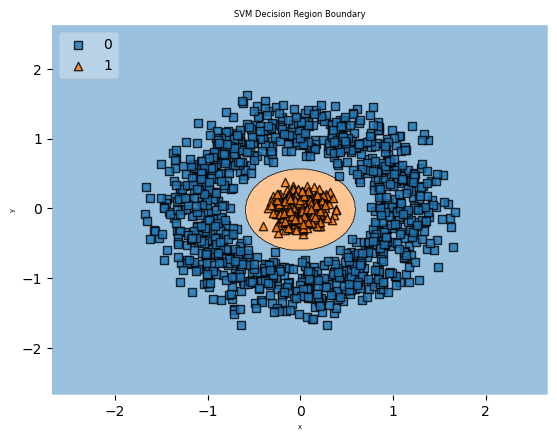

In [7]:
plot_decision_regions(X=X,y=y,clf=clf,legend=2)
plt.xlabel('x',size=5)
plt.ylabel('y',size=5)
plt.title('SVM Decision Region Boundary',size=6)
plt.show()

## Train test split 

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,y,test_size=0.3)

## Use Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [10]:
lr.score(x_test,y_test)

0.6533333333333333

## Classification using Neural network

In [11]:
import tensorflow as tf

2022-12-28 15:58:46.252007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 15:58:46.356487: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-28 15:58:46.359609: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-28 15:58:46.359617: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1,input_dim=2,activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2022-12-28 15:58:47.192655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-28 15:58:47.192668: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-28 15:58:47.192691: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nsl47): /proc/driver/nvidia/version does not exist
2022-12-28 15:58:47.192847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(tf.keras.optimizers.SGD(lr=0.5),'binary_crossentropy',metrics=['accuracy'])
result=model.fit(x_train,y_train,epochs=20,validation_split=0.1)

/home/nsl47/anaconda3/envs/bd/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6397 - accuracy: 0.6148 - val_loss: 0.6454 - val_accuracy: 0.6190
Epoch 2/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.6783 - val_loss: 0.6167 - val_accuracy: 0.6190
Epoch 3/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.6783 - val_loss: 0.6263 - val_accuracy: 0.6190
Epoch 4/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.6783 - val_loss: 0.5891 - val_accuracy: 0.6190
Epoch 5/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.6783 - val_loss: 0.5972 - val_accuracy: 0.6190
Epoch 6/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5494 - accuracy: 0.6783 - val_loss: 0.5683 - val_accuracy: 0.6190
Epoch 7/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.6783 - val_loss: 0.5669 - val_accuracy: 0.6190
Epoch 8/20
30/30 [==

In [14]:
pd.DataFrame(result.history)

,loss,accuracy,val_loss,val_accuracy
0,0.639732,0.614815,0.645397,0.619048
1,0.597563,0.678307,0.616660,0.619048
2,0.577887,0.678307,0.626292,0.619048
3,0.567390,0.678307,0.589068,0.619048
4,0.557965,0.678307,0.597206,0.619048
5,0.549376,0.678307,0.568327,0.619048
6,0.545232,0.678307,0.566938,0.619048
7,0.541455,0.678307,0.560181,0.619048
8,0.536531,0.678307,0.558013,0.619048
9,0.535128,0.678307,0.553290,0.390476


<AxesSubplot:>

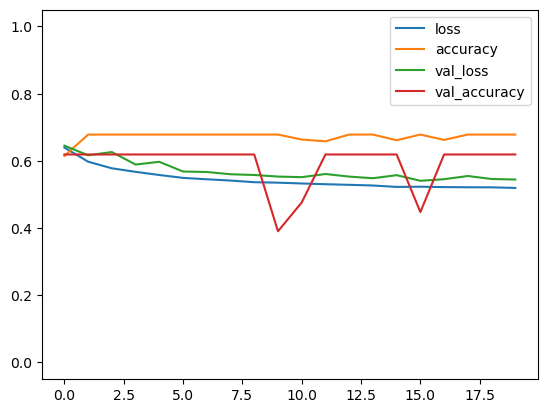

In [15]:
pd.DataFrame(result.history).plot(ylim=(-0.05,1.05))

In [16]:
history=model.evaluate(x_test,y_test)

15/15 [==============================] - 0s 541us/step - loss: 0.5336 - accuracy: 0.6533


In [17]:
print(history[1] * 100)

65.3333306312561


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    # এই লেয়ার পরে যোগ করে আমরা দেখবো 
    # tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(x_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20


/home/nsl47/anaconda3/envs/bd/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


30/30 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.6698 - val_loss: 0.6433 - val_accuracy: 0.6190
Epoch 2/20
30/30 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.6783 - val_loss: 0.6047 - val_accuracy: 0.6190
Epoch 3/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7714 - val_loss: 0.5194 - val_accuracy: 0.6190
Epoch 4/20
30/30 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8593 - val_loss: 0.3865 - val_accuracy: 1.0000
Epoch 5/20
30/30 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.9862 - val_loss: 0.2881 - val_accuracy: 1.0000
Epoch 6/20
30/30 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.9958 - val_loss: 0.2060 - val_accuracy: 1.0000
Epoch 7/20
30/30 [==============================] - 0s 1ms/step - loss: 0.1879 - accuracy: 0.9979 - val_loss: 0.1604 - val_accuracy: 1.0000
Epoch 8/20
30/30 [=============

<AxesSubplot:>

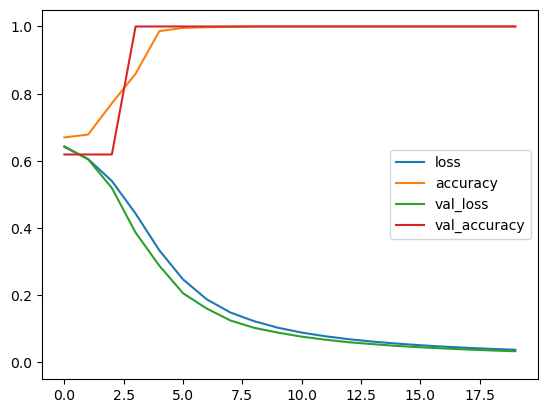

In [19]:
pd.DataFrame(h.history).plot(ylim=(-0.05,1.05))

## Confusion matrix 

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model.predict_classes(x_test) 

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
y_pred[:5]

In [ ]:
cm=confusion_matrix(y_test,y_pred)
pd.DataFrame(cm, index=['Miss','Hit'],columns=['pred_Miss','pred_Hit'])

In [ ]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)